In [1]:
def add(release, sprint, prop, value):
    release[prop][f"Sprint {sprint}"] = value
    
def build_index(arr):
    releases = []
    sprints = []
    i = 1
    for release in arr:
        for sprint in release:
            releases.append(f"Release {i}")
            sprints.append(f"Sprint {sprint}")
        i += 1
            
    return pd.MultiIndex.from_arrays([releases, sprints], names=("Release", "Sprint"))
    
def build_table():
    for name, release in df.groupby("Release"):
        df.loc[name]["RPC"] = np.cumsum(df.loc[name]["PC"])
        df.loc[name]["PPC"] = np.cumsum(len(release) * [1/len(release)])
    
    df["AC"] = df["BAC"] * df["PPC"]
    df["APC"] = df["RPC"] / df["PRP"]
    df["PV"] = df["PPC"] * df["BAC"]
    df["EV"] = df["APC"] * df["BAC"]
    df["CV"] = df["EV"] - df["AC"]
    df["SV"] = df["EV"] - df["PV"]
    df["CPI"] = df["EV"] / df["AC"]
    df["SPI"] = df["EV"] / df["PV"]
    df["ETC"] = 1/df["CPI"] * (df["BAC"] - df["EV"])
    df["EAC"] = df["AC"] + df["ETC"]
    


In [2]:
import pandas as pd
import numpy as np
sprints = 5
index = build_index([ # range(primeira sprint, ultima sprint + 1)
    range(1,3), # Release 1
    range(3,6), # Release 2
])
columns = ["PP", "PC", "PA", "PRP", "RPC", "APC", "PPC","BAC", "AC", "PV", "EV", "CV", "SV", "CPI", "SPI", "ETC", "EAC"]
data = np.zeros((sprints,len(columns)), dtype=float)
df = pd.DataFrame(data, columns=columns, index=index)

# Release 1

In [3]:
release = df.loc["Release 1"]
release["PRP"] = 50.0

## Sprint 1

In [4]:
sprint = 1
data = {
    "PP": 36.0, # pontos planejados
    "PC": 20.0, # pontos concluídos
    "PA": 0.0, # pontos adicionados
    "BAC": 1084.92 # custo planejado
}

for prop in data:
    add(release, sprint, prop, value=data[prop])

## Sprint 2

In [5]:
sprint = 2
data = {
    "PP": 29.0, # pontos planejados
    "PC": 13.0, # pontos concluídos
    "PA": 8.0, # pontos adicionados
    "BAC": 1084.92 # custo planejado
}

for prop in data:
    add(release, sprint, prop, value=data[prop])


# Release 2

In [6]:
release = df.loc["Release 2"]
release["PRP"] = 90.0

## Sprint 3

In [7]:
sprint = 3
data = {
    "PP": 34.0, # pontos planejados
    "PC": 24.0, # pontos concluídos
    "PA": 24.0, # pontos adicionados
    "BAC": 1084.92 # custo planejado
}

for prop in data:
    add(release, sprint, prop, value=data[prop])

## Sprint 4

In [8]:
sprint = 4
data = {
    "PP": 47.0, # pontos planejados
    "PC": 13.0, # pontos concluídos
    "PA": 34.0, # pontos adicionados
    "BAC": 1084.92 # custo planejado
}

for prop in data:
    add(release, sprint, prop, value=data[prop])


## Sprint 5

In [9]:
sprint = 5
data = {
    "PP": 47.0, # pontos planejados
    "PC": 31.0, # pontos concluídos
    "PA": 68.0, # pontos adicionados
    "BAC": 1084.92 # custo planejado
}

for prop in data:
    add(release, sprint, prop, value=data[prop])


In [10]:
build_table()
df

PP    PC    PA   PRP   RPC       APC       PPC      BAC  \
Release   Sprint                                                                
Release 1 Sprint 1  36.0  20.0   0.0  50.0  20.0  0.400000  0.500000  1084.92   
          Sprint 2  29.0  13.0   8.0  50.0  33.0  0.660000  1.000000  1084.92   
Release 2 Sprint 3  34.0  24.0  24.0  90.0  24.0  0.266667  0.333333  1084.92   
          Sprint 4  47.0  13.0  34.0  90.0  37.0  0.411111  0.666667  1084.92   
          Sprint 5  47.0  31.0  68.0  90.0  68.0  0.755556  1.000000  1084.92   

                         AC       PV          EV          CV          SV  \
Release   Sprint                                                           
Release 1 Sprint 1   542.46   542.46  433.968000 -108.492000 -108.492000   
          Sprint 2  1084.92  1084.92  716.047200 -368.872800 -368.872800   
Release 2 Sprint 3   361.64   361.64  289.312000  -72.328000  -72.328000   
          Sprint 4   723.28   723.28  446.022667 -277.257333 -277.257333   
          Sprint 5  1084.92  1084.92  819.717333 -265.202667 -265.202667   

                         CPI       SPI          ETC          EAC  
Release   Sprint                                                  
Release 1 Sprint 1  0.800000  0.800000   813.690000  1356.150000  
          Sprint 2  0.660000  0.660000   558.898182  1643.818182  
Release 2 Sprint 3  0.800000  0.800000   994.510000  1356.150000  
          Sprint 4  0.616667  0.616667  1036.049730  1759.329730  
          Sprint 5  0.755556  0.755556   351.003529  1435.923529

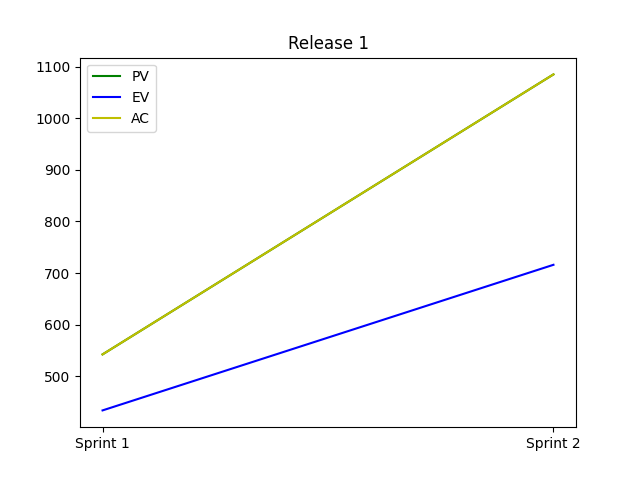

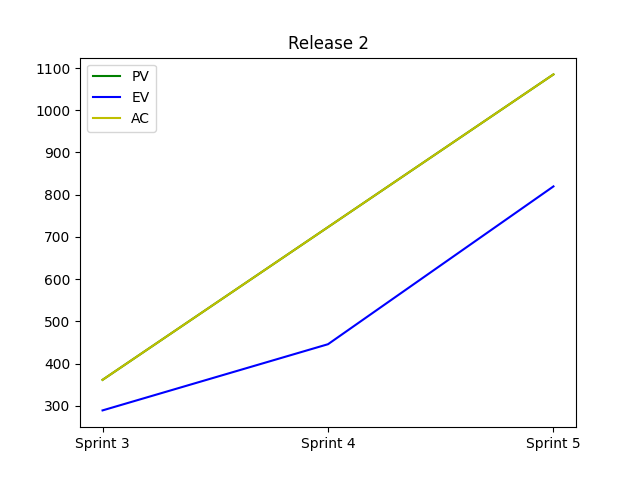

In [11]:
import matplotlib.pyplot as plt
%matplotlib widget

i = 1
for name, release in df.groupby("Release"):
    sprints = release.loc[name].index
    plt.figure(i)
    plt.plot(sprints, df.loc[name]["PV"], label="PV", color='g')
    plt.plot(sprints, df.loc[name]["EV"], label="EV", color='b')
    plt.plot(sprints, df.loc[name]["AC"], label="AC", color='y')
    plt.title(name)
    plt.legend()
    plt.show()
    i += 1
